<br>

# Chap 7. Feature Matching & Homography

🧐 if we know which points belong to the line, how do we find the "optimal" line parameters? 

🅰️ Least squares

🧐 What if there are outliers?

🅰️ Robust fitting, RANSAC

🧐 What if there are many lines?

🅰️ Voting methods : RANSAC, Hough transform

🧐 What if we're not even sure it's a line?

🅰️ Model Selection

<br>

## Least Square

### Vertical least square

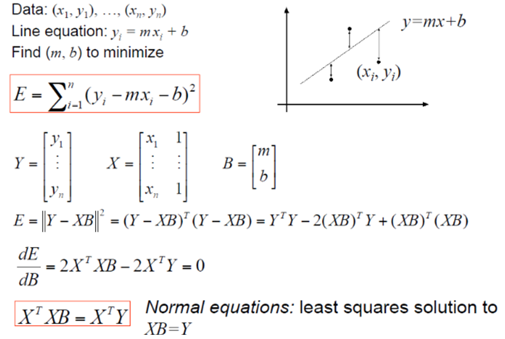

- Not ratation-invariant
- Fails completely for vertical lines

<br>

### Total least square (= Homogeneous linear system )

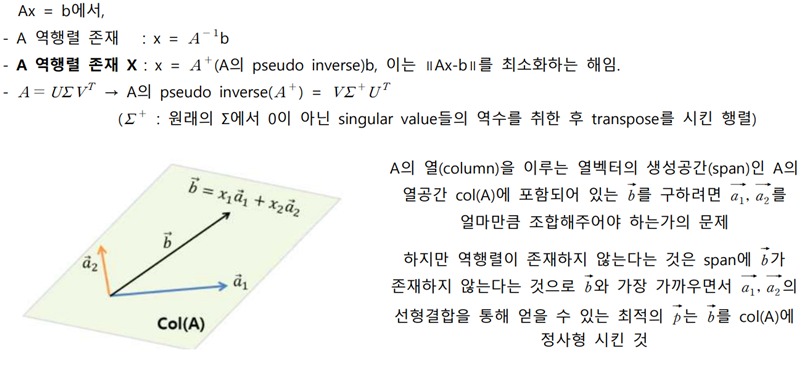

### Homogeneous Least Square Method
Ax = 0에서, 
- 특이값에 0이 포함된 경우

: 만일 A의 특이값들 중 0이 존재하면 0인 특이값에 대응하는 right singular vector (V의 열벡터)는 Ax = 0을 만족
하는 0이 아닌 해가 된다. 만일, 0의 값을 갖는 특이값이 여러개 존재할 경우에는 대응되는 right singular vector들
이 모두 Ax = 0의 해가 된다. 또한 이들 해의 임의의 일차결합도 역시 해가 된다.

- 특이값이 모두 양수인 경우

: 특이값이 모두 양수인 경우에는 Ax = 0을 정확히 만족하는 해는 X = 0을 제외하고는 존재치 않는다. 따라서, 이 
경우에는 근사적으로 해를 구해야 하는데 ∥AX∥를 최소로 하는 근사해는 A의 최소 singular value에 대응하는 right 
singular vector이다.

<br>

### Singular Vector Decomposition

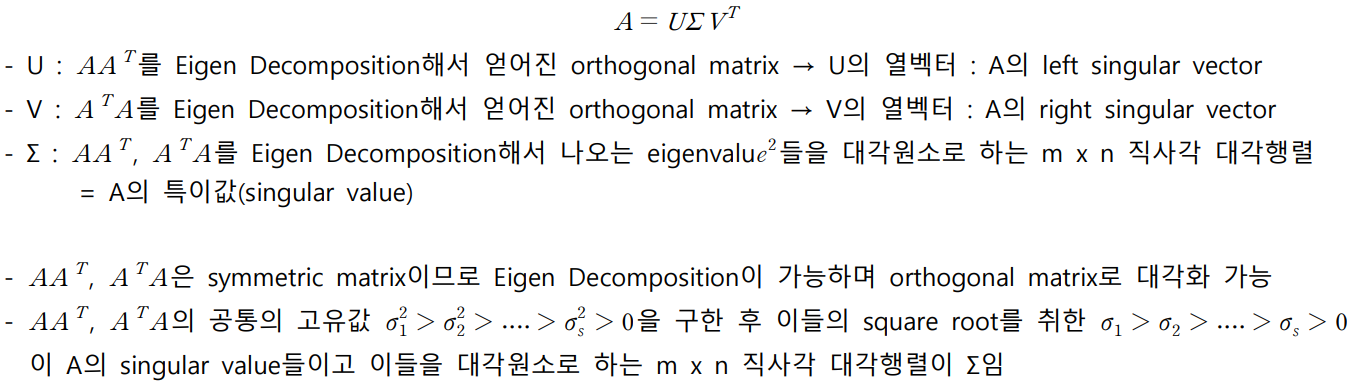

### Least Square Method의 단점
: outlier가 포함된 데이터에서는 적용 어려움 
- 전체 데이터의 residual2 합을 최소화하기 때문에 outlier의 residual도 같이 줄이려고 하다보면 전혀 잘못된 근사 결과를 낼 수 있음

<br> 

## 👉 RANSAC

### Choosing the Parameter 
: 샘플링 과정을 몇 번 (N) 반복할 것인지, inlier와 outlier의 경계를 (t) 어떻게 정할 것인지

1️⃣ Number of samples
: RANSAC이 성공하기 위해서는 N번의 시도 중 적어도 한번은 inlier들에서만 샘플 데이터가 뽑혀야 함
- RANSAC 반복회수를 N, 한번에 뽑는 샘플 개수를 m, 입력 데이터들 중에서 inlier의 비율을 α

    N번 중 적어도 한번은 inlier에서만 샘플이 뽑힐 확률 = 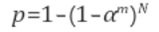

2️⃣ Distance threshold t
- inlier들의 residual 분산을 σ라 할 때, 보통, t = 2σ or 3σ 정도로 잡음
- inlier들의 residual 분산 : inlier들로만 구성된 실험 데이터에 대해서 Least Square Method을 적용하여 근사된 모델에서 inlier들과의 residual의 분산
- Zero-mean Gaussian noise with std deviation 

3️⃣ Consensus set size d
: should match expected inlier ratio

<br>

### Pros
- Simple and general
- Applicable to many different problems
- Often works well in practice

### Cons
- Lots of parameter to tune
- Doesn't work well for low inlier ratio
- Can't always get a good initilaization of the model based on theminimum number of samples

<br>

## Image Alignment
: Fitting a model to a transformation between pairs of features(matches) in two images

1️⃣ Direct( pixel-based ) Alignment

: Search for alignment where most pixels agree

2️⃣ Feature-based Alignment

: Search for alignment whrere extracted features agree
- Can be verified using pixel-based alignment

<br>

### Image Alignment Challenges
- Small degree of overlap
- Occlusion
- Clutter
- Intensity changes

<br>

### Affine Transformation 
- Simple Linear Least Squares
- Can be used to initialize fitting for more complex models
- Linear System with 6 unknowns
- Each match gives us two linearly independent equations
    - need at least three to solve for the transformation parameters

<br>

## Homograpy 

: Plane Projective Transformation

### 👉 Homography Matrix

1️⃣ For each correspondence, create 2 x 9 matrix A

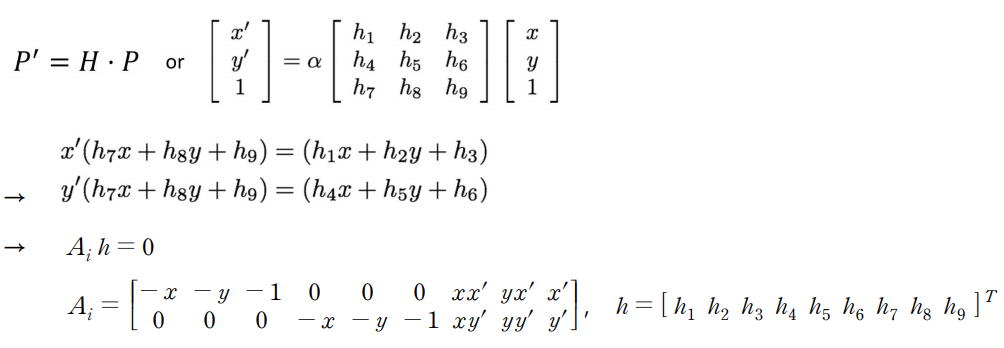

2️⃣ Concatenate into single 2n x 9 matrix A

3️⃣ Homogeneous linear least squares problem : Compute SVD of  A = UΣV^T

4️⃣ Store singular vector of the smallest singular value h = vi

5️⃣ Reshape to get H

<br>

### Matching Problem
- Linear Least Squares estimation only works when the transform function is linear
- Doesn't deal well with Outliers

## Homography using RANSAC

1️⃣ Extract feature ( detection & description )

2️⃣ Compute potential matches

3️⃣ RANSAC ( RANdom Sample Consensus ) Loop 

- Randomly select a four point correspndences. 
- Compute H
- Count inliers to the current H
- Keep H if largest number of inliers

4️⃣ Recompute H using all inliers

### Rejection of Unreliable Matches

- Heuristic: compare distance of nearest neighbor to that of second nearest neighbor
- Ratio of closest distance to second-closest distance will be high for features that are not distinctive

<br>

# Chap 9. Stereo Vision

## Epipolar Geometry
- **Baseline** : Line joining the camera centers
- **Epipole** : Point of intersection of baseline with the image plane
  - Projection of o' on the image plane
  - Epipole is not always in the image
  - Epipole at infinity when cameras are parallel
- **Epipolar plane** : Plane containing baseline and world point
- **Epipolar line** : Intersection of epipolar plane with the image plane


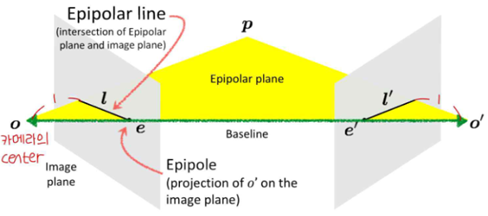

- All epipolar lines intersect at the epipole
- All epipolar plane intersects the left and right image planes in epipolar lines

## Epipolar Constraint
: Geometry of 2 views allow us to constrain where the corresponding pixel for some image point in the first view must occur in the second view
- Reduces correspondence porblem to 1D searching along conjugate epipolar lines

## Essential Matrix
: Given a point in one image, multiply by **Essential Matrix** will tell us the **Epipolar Line** in the second images
- 2D points expressed in **Camera Coordinate** System
- Operates on images points expressed in **Normalized Coordinates**


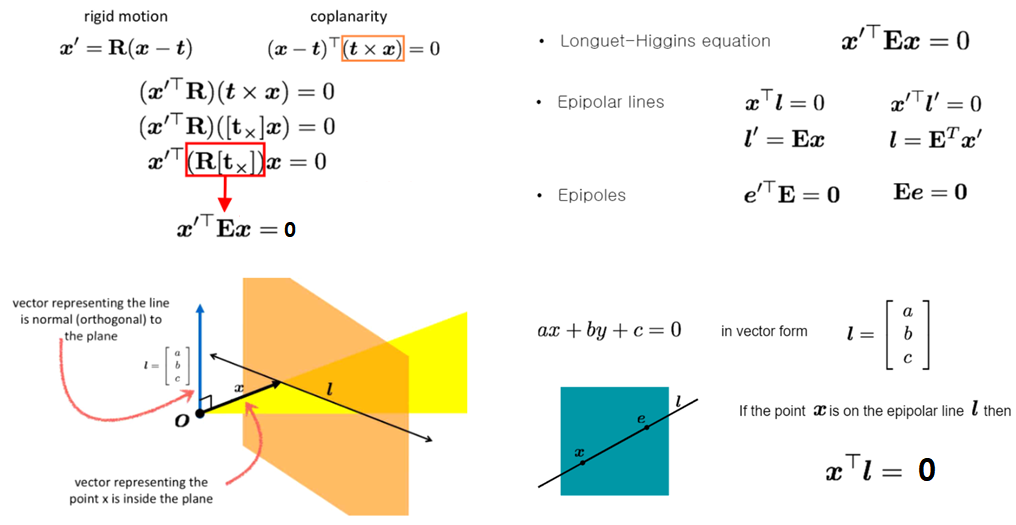

### 📌 Essential Matrix vs Homography

|           | Essential Matrix | Homography       |
|-----------|------------------|------------------|
| Mapping   | Point to a Line  | Point to a Point |
| Algorithm | 8개점 필요       | 4개점 필요       |

## Fundamental Matrix
: Generalization for the Essential Matrix, where the assumption of calibrated camera is removed
- Points in **Image Coordinates**

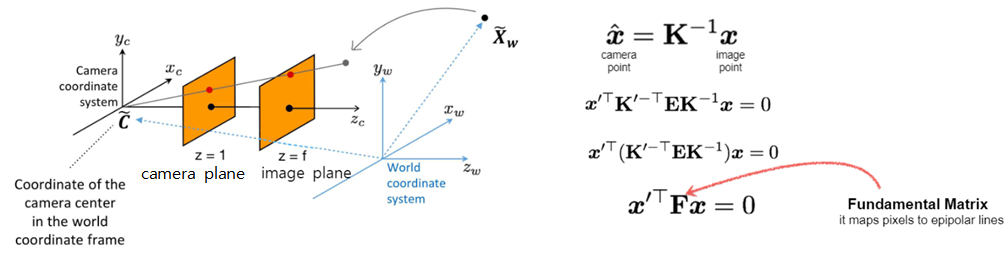


- Depends on both **intrinsic** and **extrinsic parameters**

<br> 

### Eight-Point Algorithm
1. Normalize points
2. Construct the M x 9 matrix A
3. Find the SVD of A
4. Store **Singular vector** of smallest singular value F = vi
5. Enforce rank 2 constraint on F
- Point( DOF = 0 ) ➜ Line( DOF = 1 )
- 3개였던 constraint를 2개로 relax해주기 위함
6. Un-normalize F

<br>

## Triangulation
: Find 3D object point
1. Select point in one image
2. Form epipolar line for that point in second image
3. Find matching point along line
4. Perform triangulation

- KNOWN : Image Point (x, x'), Camera Matrix (P, P')
- UNKNOWN : 3D Object Point

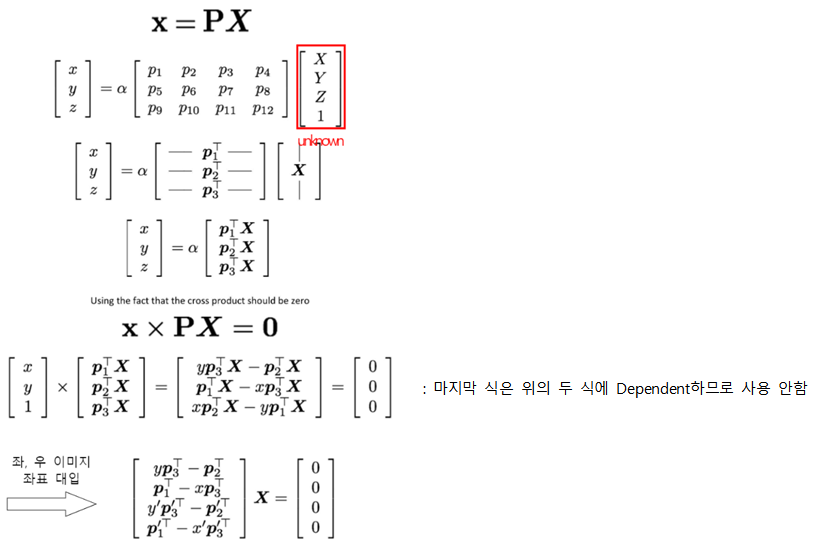

<br>

## Stereo Rectification

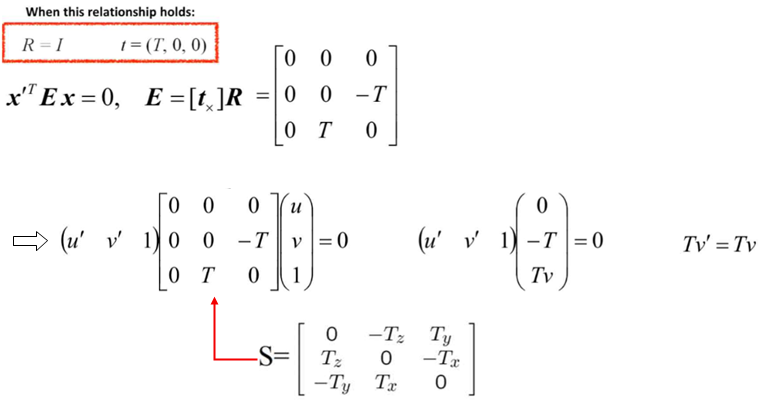

## Stereo Rectification
1. Estimate Essential matrix
2. Estimate the epipole e 

- SVD of E
- Singular vector of the smallest singular value
- Translation from E

      e = v1 = T

  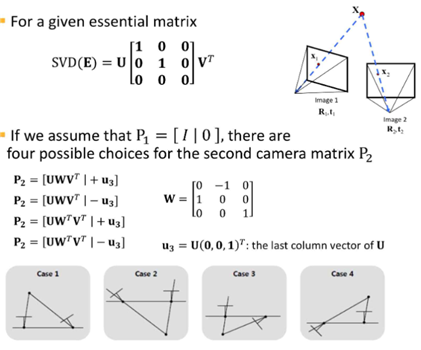




3. Build R_rect from e

  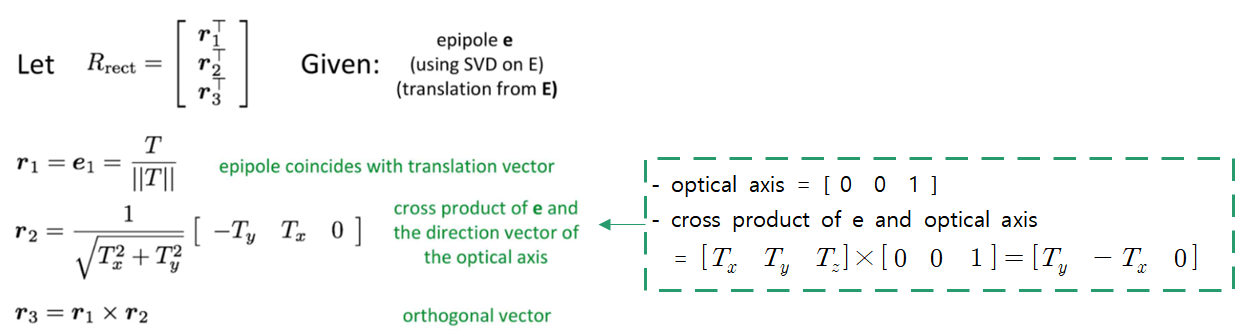



4. Decompose E into R and T
5. Set R1 = R_rect, R2 = RR_rect
6. Rotate each left camera point

        [ x'_l  y'_l  z'_l ] = R1[x_l  y_l  z_l ]
        [ x'_r  y'_r  z'_r ] = R2[x_r  y_r  z_r ]

7. Rectified points as 

        p_l = f/z'_l[x'_l  y'_l  z'_l]
        p_r = f/z'_r[x'_r  y'_r  z'_r]

<br>

## Stereo Matching
- The amount of horizontal movement is inversely proportional to the distance from camera
1. Recifiy images( make epipolar lines horizontal )
2. Find epipolar line
3. Scan line for best match
4. Compute depth from disparity

        depth = baseline x focal length / disparity

## Disparity Space Image( DSI )

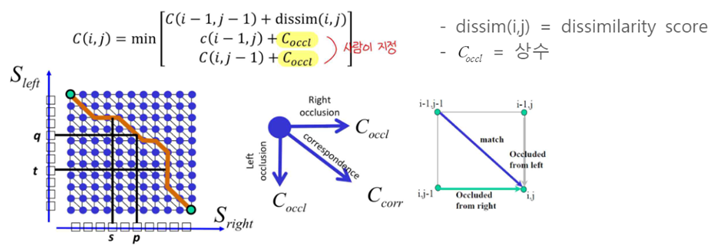
